<a href="https://colab.research.google.com/github/biswa-13/DataScience/blob/master/R1_ISLR_model_V1_input__1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Omm Namah Sivaya**
<br/>This colab will demostrate how to perfom the Image Augmentation along with preparing the training and testing dataset.

- Image Augmentation : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
- Image Processing : https://keras.io/api/preprocessing/image/
- loadig image dataset using keras: https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
- xml to csv : https://github.com/datitran/raccoon_dataset/blob/master/xml_to_csv.py
- tfRecord conversion: https://github.com/datitran/raccoon_dataset/blob/master/generate_tfrecord.py

In [2]:
### Section -1 importing required libraries

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
import keras.preprocessing
from  keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from tensorflow.keras import  layers
from keras.layers import Conv2D, Flatten, Dropout, Dense
from keras import applications
from keras.applications import VGG16
from os import walk
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as image
from sklearn.metrics import confusion_matrix, accuracy_score

%tensorflow_version

Using TensorFlow backend.


Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
### Section -2

# datagen = ImageDataGenerator(
#     rotation_range= 40,
#      width_shift_range= 0.2, 
#      height_shift_range= 0.2, 
#      shear_range = 0.2,
#      zoom_range = 0.2,
#      fill_mode = "nearest",
#     )
datagen1 = ImageDataGenerator(
    rotation_range= 45,
     width_shift_range= 0.2, 
     height_shift_range= 0.2, 
     shear_range = 0.2,
     zoom_range = 0.2,
     fill_mode = "nearest",
     rescale=1./255
    )
def imgAugmentation(imgPath, prefix, outputPath):
  print("\n Start : imgAugmentation() :",imgPath)
  # img = load_img("SignLanguageDigitDatasetforTransferLrng/test/I.png") # this is a PIL image
  img = load_img(imgPath) # this is a PIL image
  x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i=0
  for batch in datagen1.flow(x, batch_size=1, save_format="JPG", save_prefix=prefix,save_to_dir=outputPath):
    i += 1
    if(i > 30):
      break  # otherwise the generator would loop indefinitely
  print("Finish : imgAugmentation() :",imgPath)

# imgAugmentation("SignLanguageDigitDatasetforTransferLrng/test/I.png",1,"preview")
print("finish: ImageDataGenerator() initialized ...")

In [ ]:
### Section -3

# code blok to get  all the images along with the path availble under the train dataset

i=0
train_all_dirs = []
train_all_imgs = []

# get all the directories and files available in a folder
img_fldr = "train_nmbr_fig_only"
for(dirPath, dirName, fileName) in walk(img_fldr):
  i+=1
  print(i)
  if(i == 1):
    # get the sub-directories availbale under "SignLanguageDigitDatasetforTransferLrng/train" folder
    print(dirPath, dirName, fileName)
  else:
      train_all_dirs.append(dirPath)
      train_all_imgs.append(fileName)

print(train_all_dirs)
print(train_all_imgs)

print("\nFinish: fetching all the images from the uploaded dataset ...")

In [ ]:
### Section -4 Image augmentation


#  code block to run the image augmentation on the images availble under the train dataset
print("\n Start : Image Augmentation Process")
index = 0
for(item) in train_all_imgs:
  fldr_path = train_all_dirs[index]
  for(imgs) in item:
    print(fldr_path+"/"+imgs) # gives output like "SignLanguageDigitDatasetforTransferLrng/train/one/USER-1-1-2.png"
    imgPath = fldr_path+"/"+imgs
    imgAugmentation (imgPath, index, fldr_path) 
  index +=1
print("\n\n Finish : Image Augmentation Process")

In [ ]:
### Section - misc
# loading images from the local machine, path : G:\Sign Language\programs
# !pwd

# !ls
# !rm  train_nmbr_fig_only -r
# !unzip sample_data/train_nmbr_fig_only.zip
# !rm dataset -r
# !rm islr_1_2_3_dataset -r
# !unzip sample_data/islr_1_2_3_dataset.zip
# !rm sample_data/islr_1_2_3_dataset.zip
# !zip sl_trn_tst_dataset.zip dataset -r
# %cd dataset/validation/
# !unzip one.zip
# !unzip two.zip
# %ls
# %cd dataset/validation
# %cd ../..
# %cd content/
%pwd
%ls


In [6]:
### Section -5
# Section -5.1 prepare the dataset for training and testing
#!cp /content/train_nmbr_fig_only /content/test_nmbr_fig_only -r


## code blok to get the all the images along with the path availble under the train dataset

i=0
train_all_dirss = []
train_all_imgss = []

# get all the directories and files available in a folder
img_fldrr = "train_nmbr_fig_only"
for(dirPath, dirName, fileName) in walk(img_fldrr):
  i+=1
  print(i)
  if(i == 1):
    # get the sub-directories availbale under "SignLanguageDigitDatasetforTransferLrng/train" folder
    print(dirPath, dirName, fileName)
  else:
      train_all_dirss.append(dirPath)
      train_all_imgss.append(fileName)

print(train_all_dirss)
print(train_all_imgss)

# Section -5.2 code block to prepare the training and testing image dataset

print("\n Start : training and testing image dataset Process")
# creating the destination dataset which will contain the train and test dataaset
dest_fldr = "dataset"
dest_train_fldr = "dataset/train"
dest_test_fldr =  "dataset/test"
!mkdir $dest_fldr
!mkdir $dest_train_fldr
!mkdir $dest_test_fldr

index1 = 0
for(item1) in train_all_imgss:
  fldr_path1 = train_all_dirss[index1]
  print("\n ****************** index1 -->",index1,", fldr_path1 -->",fldr_path1)
  # create sub floders under the "dataset/train" for every sign letter
  new_fldr_train_path = fldr_path1.replace(img_fldrr, dest_train_fldr)
  !mkdir $new_fldr_train_path
  # create sub floders under the "dataset/test" for every sign letter
  new_flder_test_path = fldr_path1.replace(img_fldrr, dest_test_fldr)
  !mkdir $new_flder_test_path

  # partitioning the image datasets into 80% for training and 20% for testing
  train_len = int(len(item1) * 0.8)
  print("train_len -->",train_len)
  train_imgs = item1[:train_len]
  test_imgs = item1[train_len:]
  train_img_count = 0
  test_img_count = 0

  print("train_imgs -->\n",train_imgs)
  print("test_imgs -->\n",test_imgs)
  # preparing train dataset
  for (img3) in train_imgs:
    train_img_count += 1
    src_img_path = fldr_path1+"/"+img3
    print("train_img_count -->",train_img_count,", src_img_path -->",src_img_path,", dest_img_path -->",new_fldr_train_path)
    !cp $src_img_path $new_fldr_train_path

  # preparing train dataset
  for (img5) in test_imgs:
    test_img_count += 1
    src_img_path = fldr_path1+"/"+img5
    print("test_img_count -->",test_img_count,", src_img_path -->",src_img_path,", dest_img_path -->",new_flder_test_path)
    !cp $src_img_path $new_flder_test_path 


  # for(imgs1) in item1:
  #   # print(fldr_path1+"/"+imgs1) # gives output like "SignLanguageDigitDatasetforTransferLrng/train/one/USER-1-1-2.png"
  #   imgPath1 = fldr_path1+"/"+imgs1
  index1 +=1
print("\n\n Finish : training and testing image dataset Process")

[]
[]

 Start : training and testing image dataset Process
mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/train’: File exists
mkdir: cannot create directory ‘dataset/test’: File exists


 Finish : training and testing image dataset Process


In [4]:
# Section -6.0 (Optional) to know the floder structure along with the file counts in each folder
fileData = walk("dataset")
for data in fileData:
  # print(data)
  print("Folder Name -->",data[0])
  print("File Contents -->", len(data[2]))

Folder Name --> dataset
File Contents --> 0
Folder Name --> dataset/.ipynb_checkpoints
File Contents --> 0
Folder Name --> dataset/test
File Contents --> 0
Folder Name --> dataset/test/sign_3
File Contents --> 57
Folder Name --> dataset/test/sign_2
File Contents --> 57
Folder Name --> dataset/test/sign_1
File Contents --> 57
Folder Name --> dataset/validation
File Contents --> 10
Folder Name --> dataset/train
File Contents --> 0
Folder Name --> dataset/train/sign_3
File Contents --> 227
Folder Name --> dataset/train/sign_2
File Contents --> 227
Folder Name --> dataset/train/sign_1
File Contents --> 227


In [4]:
# Section -6.1 preparing the dataset accorrding to the required fromat by the tensorflow model 

# def formatImage(image, label):
#   image = tf.image.resize(image, (img_size, img_size))/255.0
#   return image, label
datset_train_path = "dataset/train"
datset_test_path =  "dataset/test"
imgDataGen3 = ImageDataGenerator()
img_size = 64
batch_size = 12
# load data from the local directory using the flow_from_directory() of ImageDataGenerator Class

# load and iterate training dataset
train_img_datset = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=datset_train_path,
                         target_size = (img_size, img_size),
                         batch_size= batch_size, class_mode='categorical')
# load and iterate test dataset
test_img_datset = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=datset_test_path, 
                         target_size = (img_size, img_size),
                         batch_size= batch_size, class_mode='categorical',shuffle= False)
# (Optional)load and iterate validation dataset, we have done this only to show the images 
val_img_datset = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=datset_test_path, 
                         target_size = (img_size, img_size),
                         batch_size= batch_size,class_mode='categorical')
print("\n Finish: preparing the dataset accorrding to the required fromat by the tensorflow model.")

Found 681 images belonging to 3 classes.
Found 171 images belonging to 3 classes.
Found 171 images belonging to 3 classes.

 Finish: preparing the dataset accorrding to the required fromat by the tensorflow model.


In [7]:
# Section -6.1 retriving a single batch of data from each dataset
sample_train_data = next(train_img_datset)
# sample_train_data
sample_test_data = next(test_img_datset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

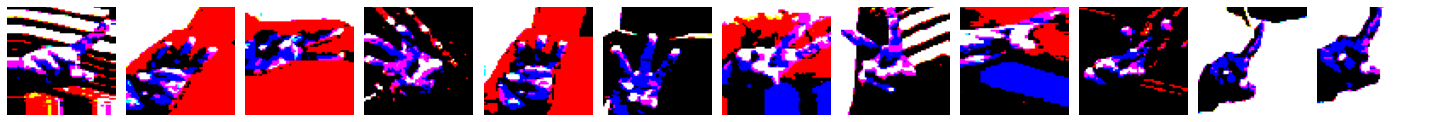

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [5]:
# Section -6.3(Optional) function to visualize the images 
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(1, 12, figsize=(20,20))
    # axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    print(labels)


imgs, labels = next(val_img_datset)
plotImages(imgs, labels)
# print(labels)

In [28]:
# Section -7
# Creating Sign Recognizer CNN model
# Section -7.1 Consturcting the model
num_classes = 3
model = Sequential()
model.add(Conv2D(
    32, kernel_size = (3,3), strides = 2, activation="relu", input_shape=(img_size,img_size,3)
))
model.add(Dropout(0.5))
model.add(Conv2D(
    64, kernel_size = (5,5), strides = 2, activation="relu"
))
model.add(Dropout(.5))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

print("Finish: Section -7.1 Consturcting the model ")


Finish: Section -7.1 Consturcting the model 


In [29]:
# Section -7.2 Compiling the model
model.compile(
    optimizer = keras.optimizers.adam(learning_rate=0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()
print("Finish: Section -7.2 Compiling the model")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 31, 31, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [38]:
# Section -7.2.1 creating required parameter values for the fit_generator()
# Calculating the steps_per_epoch
# steps_per_epoch = no. of images in a folder/ batch_size
steps_per_epoch = round(227/ batch_size)
print("steps_per_epoch -->",steps_per_epoch)
my_callbacks = [
                keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
]
epochs = 80


steps_per_epoch --> 19


In [39]:
# Section -7.3 Training the model
history = model.fit_generator(train_img_datset, steps_per_epoch= steps_per_epoch,
                              validation_data = test_img_datset,
    validation_steps= steps_per_epoch,epochs= epochs)

print("\n\n Finish: Section -7.3 Training the model")

Epoch 1/80
19/19 [==============================] - 0s 19ms/step - loss: 0.0700 - accuracy: 0.9822 - val_loss: 0.3508 - val_accuracy: 0.8539
Epoch 2/80
19/19 [==============================] - 0s 16ms/step - loss: 0.0558 - accuracy: 0.9868 - val_loss: 0.2477 - val_accuracy: 0.8539
Epoch 3/80
19/19 [==============================] - 0s 16ms/step - loss: 0.0833 - accuracy: 0.9825 - val_loss: 0.0148 - val_accuracy: 0.8493
Epoch 4/80
19/19 [==============================] - 0s 19ms/step - loss: 0.0724 - accuracy: 0.9737 - val_loss: 1.0963 - val_accuracy: 0.8000
Epoch 5/80
19/19 [==============================] - 0s 15ms/step - loss: 0.0833 - accuracy: 0.9737 - val_loss: 0.1338 - val_accuracy: 0.8539
Epoch 6/80
19/19 [==============================] - 0s 15ms/step - loss: 0.0964 - accuracy: 0.9689 - val_loss: 1.2197 - val_accuracy: 0.8447
Epoch 7/80
19/19 [==============================] - 0s 15ms/step - loss: 0.0757 - accuracy: 0.9868 - val_loss: 3.0914 - val_accuracy: 0.7671
Epoch 8/80
19


 Finish: Function to plot the accuracy graph duirng the model training


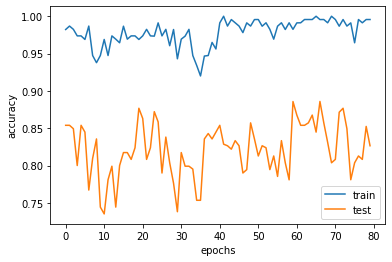

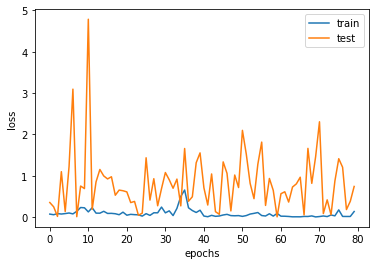

In [40]:
# Section -8 Function to plot the accuracy graph duirng the model training
def drawGraph(history, string):
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.legend(["train", "test"])
  plt.show()
print("\n Finish: Function to plot the accuracy graph duirng the model training")
drawGraph(history, "accuracy")
drawGraph(history, "loss")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

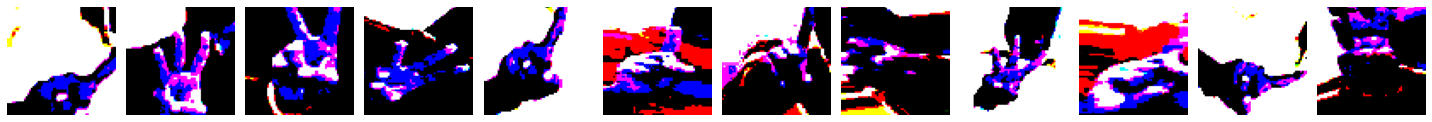

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [43]:
# Section -9 Model accuracy prediction
test_imgs, test_labels = next(val_img_datset)
plotImages(test_imgs, test_labels)
# pred_result = model.predict_generator()


In [55]:
# Section -9.1 Plot Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[51  5  1]
 [ 5 41 11]
 [ 6  3 48]]


 Model Accuracy  is : 81.87134502923976


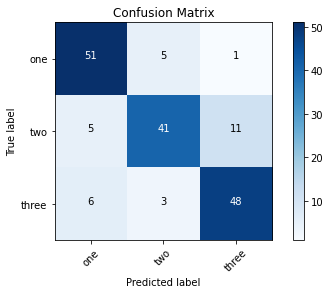

In [58]:
# Section -9.2 Performing the prediction on model
pred_result =  model.predict_generator(test_img_datset, steps=len(test_img_datset))
pred_result = np.round(pred_result)
# pred_result
cm = confusion_matrix(y_true=test_img_datset.classes, y_pred=np.argmax(pred_result, axis=-1))

cm_plot_labels = ['one','two', 'three']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,normalize=False, title='Confusion Matrix')
accurracy = accuracy_score(y_true=test_img_datset.classes, y_pred=np.argmax(pred_result, axis=-1))
print("\n\n Model Accuracy  is :",accurracy*100)
# print("\n\n Confucion Matrix is: ", cm)

In [ ]:
# Section -10 Saving the model

# # save model in *.h5 format
modelName = "islr_1_2_3.h5"
# model.save(modelName)

# # save model using the savemodel() so that it can be used in tflite
saved_model_nem = "islr_1_2_3_save_model"
# tf.saved_model.save(model, saved_model_nem)
# !zip islr_1_2_3_save_model.zip islr_1_2_3_save_model

In [83]:
# Section -11 Function to perform the Prediction using the model

# refernce : https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras/48513657
# from PIL import Image
def predictImg(img_path):
  print("predictImg() :",img_path)
  img = image.load_img(img_path, target_size=(img_size, img_size))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  output_class = model.predict_classes(images, batch_size=10)
  print("Result -->",output_class,output_class[0])

In [ ]:
# Scetion -misc predicting the given images using the model
predictImg("dataset/validation/1.1.JPG")
predictImg("dataset/validation/2.1.JPG")
predictImg("dataset/validation/3.0.JPG")
print("\n\n")

predictImg("dataset/validation/1.2.JPG")
predictImg("dataset/validation/2.2.JPG")
predictImg("dataset/validation/3.1.JPG")

print("\n\n")

predictImg("dataset/validation/1.3.JPG")
predictImg("dataset/validation/2.3.JPG")

In [15]:
vgg16_trained_model = Sequential()
vgg16_trained_model.add(keras.applications.VGG16(include_top=False, pooling='avg'))

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg16_trained_model.add(Dense(3, activation="softmax"))
vgg16_trained_model.layers[0].trainable = False
vgg16_trained_model.compile(
    optimizer = keras.optimizers.SGD,
    loss="categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:

history = vgg16_trained_model.fit_generator(train_img_datset,
                                            steps_per_epoch= steps_per_epoch,
                              validation_data = test_img_datset,
                              validation_steps= steps_per_epoch,epochs= epochs)